### Using TextBlob¶
#### TextBlob is a simple library for text processing and sentiment analysis

In [1]:
pip install textblob

In [3]:
from textblob import TextBlob
# Sample text
text = "I love Python programming. It's so versatile and fun!"

# Create a TextBlob object
blob = TextBlob(text)

# Perform sentiment analysis
print("Polarity:", blob.sentiment.polarity)  # Range: -1 (negative) to 1 (positive)
print("Subjectivity:", blob.sentiment.subjectivity)  # Range: 0 (objective) to 1 (subjective)

# Polarity measures the emotional tone of the text on a scale from -1 to 1. -1:
# Completely negative sentiment,0: Neutral sentiment,1: Completely positive sentiment
# Subjectivity measures how much a statement is influenced by personal feelings or opinions versus factual information.
# The scale ranges from 0 to 1. 0: Completely objective (fact-based), 1: Completely subjective (opinion-based)

Polarity: 0.4375
Subjectivity: 0.4


In [5]:
import pandas as pd
clean_df = pd.read_csv('BA_clean_dataset.csv')
print (clean_df.Comment)

0          I recently travelled from Munich to London ...
1         I paid for seats 80 A and B on my flight fro...
2        The flight wasn’t that bad, although the Infl...
3         I decided to treat myself and my teenage dau...
4         I was very impressed with their efficient bo...
                              ...                        
3368    I cannot believe that BA calls their plane fro...
3369    AMS-LHR-JNB and CPT-LHR-AMS in club. 767 betwe...
3370    Travelled JFK - LHR late November. The Concord...
3371    We flew "Business/1st class" from London to Du...
3372    LGW-TFS in November 2014. Flight left Gatwick ...
Name: Comment, Length: 3373, dtype: object


In [11]:
# Ensure 'Comment' column exists in clean_df
if 'Comment' in clean_df.columns:
    # Apply TextBlob to each comment in the DataFrame
    clean_df['Polarity'] = clean_df['Comment'].apply(lambda text: TextBlob(text).sentiment.polarity)
    clean_df['Subjectivity'] = clean_df['Comment'].apply(lambda text: TextBlob(text).sentiment.subjectivity)

     # Display only the required columns
    print(clean_df[['Comment', 'Polarity', 'Subjectivity']])
else:
    print("The column 'Comment' does not exist in clean_df.")

                                                Comment  Polarity  \
0        I recently travelled from Munich to London ... -0.016706   
1       I paid for seats 80 A and B on my flight fro...  0.017572   
2      The flight wasn’t that bad, although the Infl...  0.162037   
3       I decided to treat myself and my teenage dau...  0.013722   
4       I was very impressed with their efficient bo...  0.300000   
...                                                 ...       ...   
3368  I cannot believe that BA calls their plane fro... -0.126563   
3369  AMS-LHR-JNB and CPT-LHR-AMS in club. 767 betwe...  0.202498   
3370  Travelled JFK - LHR late November. The Concord...  0.246818   
3371  We flew "Business/1st class" from London to Du...  0.033333   
3372  LGW-TFS in November 2014. Flight left Gatwick ...  0.000529   

      Subjectivity  
0         0.451552  
1         0.261232  
2         0.584259  
3         0.466139  
4         0.420000  
...            ...  
3368      0.469271  
336

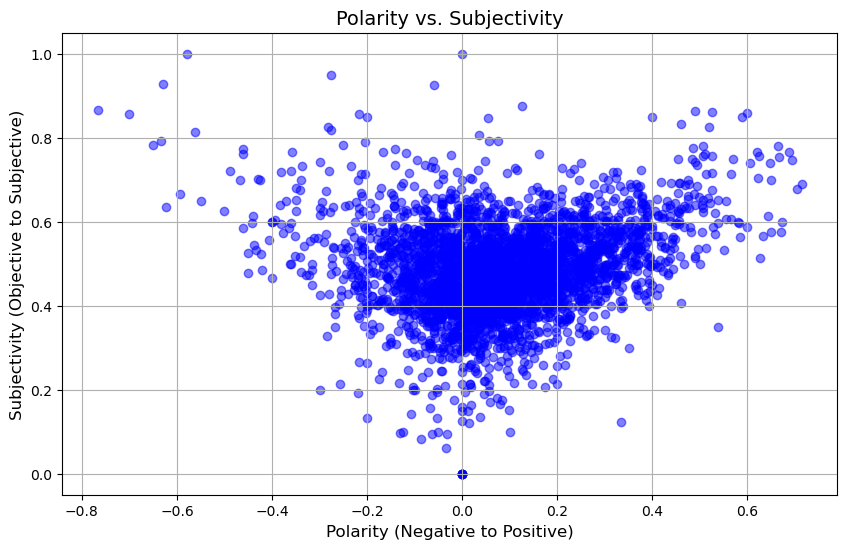

In [13]:
#  show overall distribution
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Polarity'], clean_df['Subjectivity'], alpha=0.5, color='blue')

# Add labels and title
plt.title('Polarity vs. Subjectivity', fontsize=14)
plt.xlabel('Polarity (Negative to Positive)', fontsize=12)
plt.ylabel('Subjectivity (Objective to Subjective)', fontsize=12)
plt.grid(True)
plt.show()

# The dataset appears balanced, with most comments falling in the neutral range of polarity.
# Subjectivity is concentrated around mid-levels, indicating that the comments often mix facts with opinions.

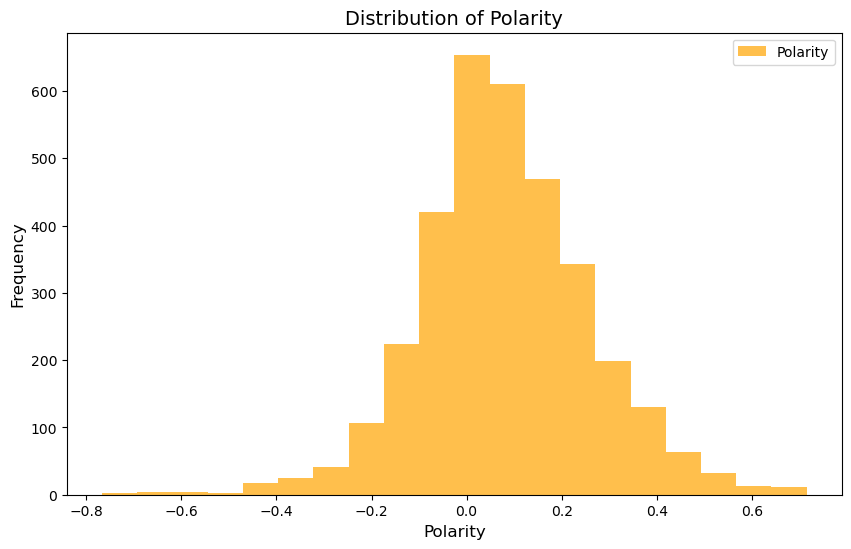

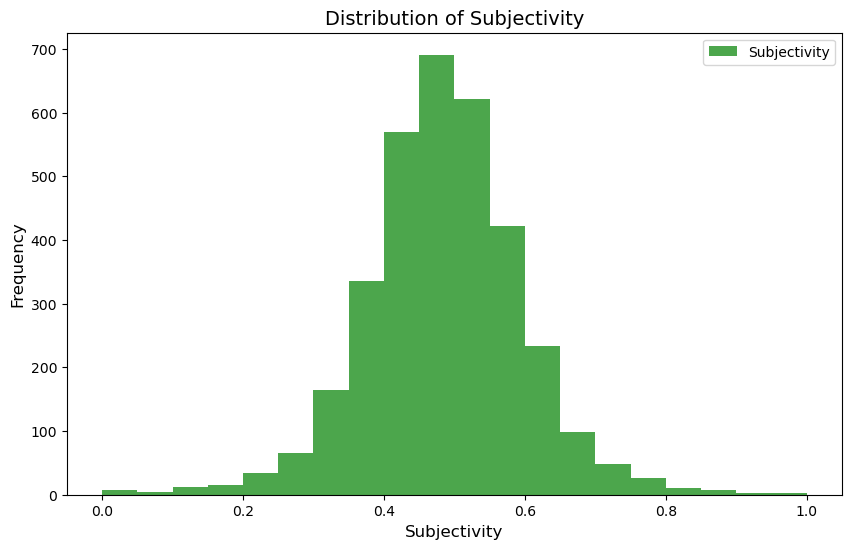

In [15]:
# Plot histogram for polarity
plt.figure(figsize=(10, 6))
clean_df['Polarity'].hist(bins=20, alpha=0.7, color='orange', label='Polarity')

# Add labels and title
plt.title('Distribution of Polarity', fontsize=14)
plt.xlabel('Polarity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(False)
plt.show()

# Plot histogram for subjectivity
plt.figure(figsize=(10, 6))
clean_df['Subjectivity'].hist(bins=20, alpha=0.7, color='green', label='Subjectivity')

# Add labels and title
plt.title('Distribution of Subjectivity', fontsize=14)
plt.xlabel('Subjectivity', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.grid(False)
plt.show()


In [19]:
pip install wordcloud

   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/299.9 kB ? eta -:--:--
   --- ----------------------------------- 30.7/299.9 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/299.9 kB 178.6 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/299.9 kB 252.2 kB/s eta 0:00:01
   ------------ ------------------------- 102.4/299.9 kB 368.6 kB/s eta 0:00:01
   ---------------- --------------------- 133.1/299.9 kB 413.7 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/299.9 kB 506.0 kB/s eta 0:00:01
   --------------------------- ---------- 215.0/299.9 kB 523.8 kB/s eta 0:00:01
   --------

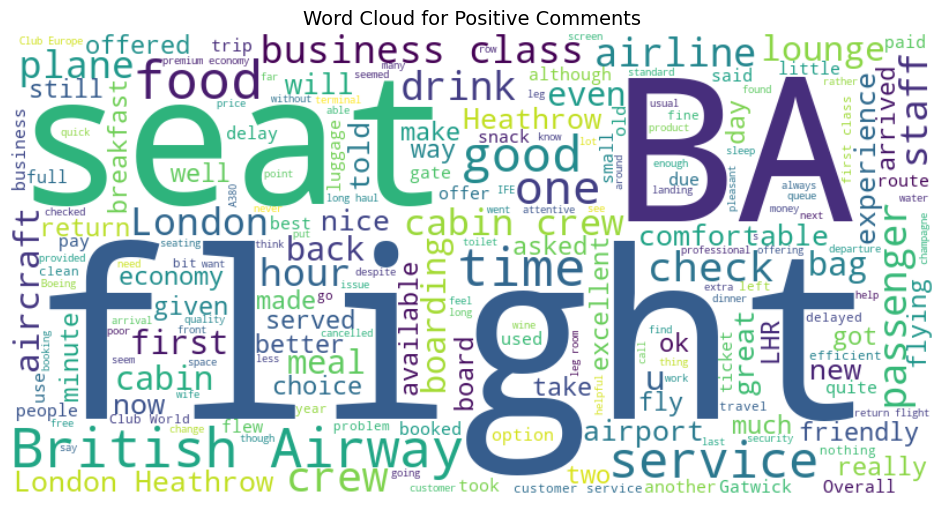

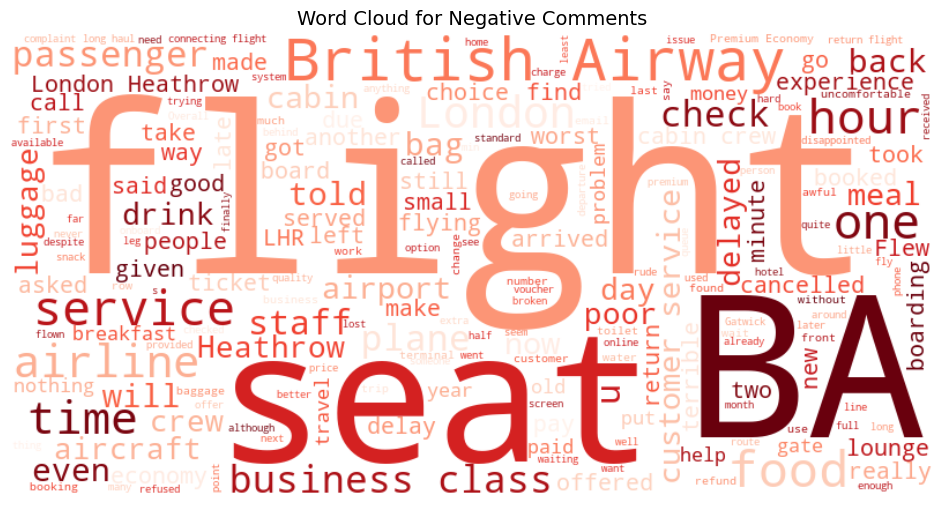

In [21]:
from wordcloud import WordCloud

# Generate word clouds for positive and negative comments
positive_text = ' '.join(clean_df[clean_df['Polarity'] > 0]['Comment'])
negative_text = ' '.join(clean_df[clean_df['Polarity'] < 0]['Comment'])

# WordCloud for positive comments
plt.figure(figsize=(12, 6))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Comments', fontsize=14)
plt.show()

# WordCloud for negative comments
plt.figure(figsize=(12, 6))
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(negative_text)
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Comments', fontsize=14)
plt.show()


### Limitations

Accuracy of Sentiment Analysis:
TextBlob's sentiment analysis is based on a pre-trained model and can be less accurate for complex, nuanced, or domain-specific texts. It works well for general sentiments but may fail in specialized domains such as technical, medical, or sarcastic content.

Simple Sentiment Model:
The sentiment analysis in TextBlob uses a simple lexicon-based approach, which relies on predefined word sentiment scores. More advanced models (like those based on deep learning) can provide better results on difficult cases, such as sarcasm or irony.

Limited Languages for Translation:
The translation feature uses Google Translate, which supports many languages, but not all languages are supported equally well. Also, translation might not always be perfect for rare languages or dialects.

Performance for Large Datasets:
TextBlob is designed for simplicity and ease of use, but it may not be the most efficient tool for handling large datasets. Processing large amounts of text can be slower compared to other libraries like SpaCy, which is optimized for speed.

No Deep Context Understanding:
TextBlob does not have deep semantic understanding, so it can struggle with texts that require contextual knowledge (e.g., multiple meanings of a word, idiomatic expressions).

Limited Customization:
While TextBlob is excellent for general NLP tasks, it may not be as customizable or flexible as other NLP libraries like SpaCy or Hugging Face’s Transformers. For tasks that require fine-tuning or domain-specific models, you may need a more advanced tool.